In [1]:
import numpy as np
import scipy.integrate as spi
import sympy

%matplotlib inline

In [2]:
def f(x):
    return sympy.log(1 + 2 * sympy.atan(x/2))

x = sympy.Symbol('x')

yprime = sympy.diff(f(x),x)
yprime2 = sympy.diff(yprime,x)
yprime3 = sympy.diff(yprime2,x)
yprime4 = sympy.diff(yprime3,x)

-x/(2*(x**2/4 + 1)**2*(2*atan(x/2) + 1)) - 1/((x**2/4 + 1)**2*(2*atan(x/2) + 1)**2)

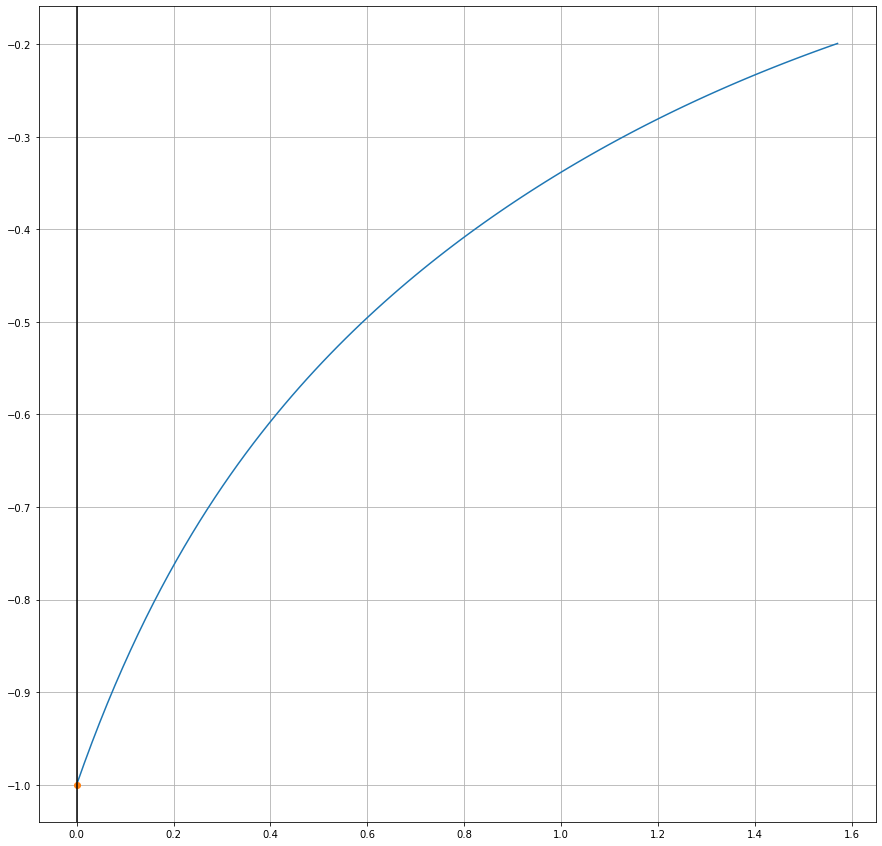

In [3]:
def show_2_derivative():
    import matplotlib.pyplot as plt

    xs = np.linspace(0,np.pi/2,100)

    ys = [yprime2.subs(x,i) for i in xs]

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(xs, ys, "-")
    ax.plot(0,yprime2.subs(x,0), "o")
    ax.grid(True, which='both')
    ax.axvline(x=0, color='k')
    fig.show()

show_2_derivative()
yprime2

-3*x**3/(4*(x**2/4 + 1)**4*(2*atan(x/2) + 1)) - 11*x**2/(4*(x**2/4 + 1)**4*(2*atan(x/2) + 1)**2) + 3*x/(2*(x**2/4 + 1)**3*(2*atan(x/2) + 1)) - 6*x/((x**2/4 + 1)**4*(2*atan(x/2) + 1)**3) + 2/((x**2/4 + 1)**3*(2*atan(x/2) + 1)**2) - 6/((x**2/4 + 1)**4*(2*atan(x/2) + 1)**4)

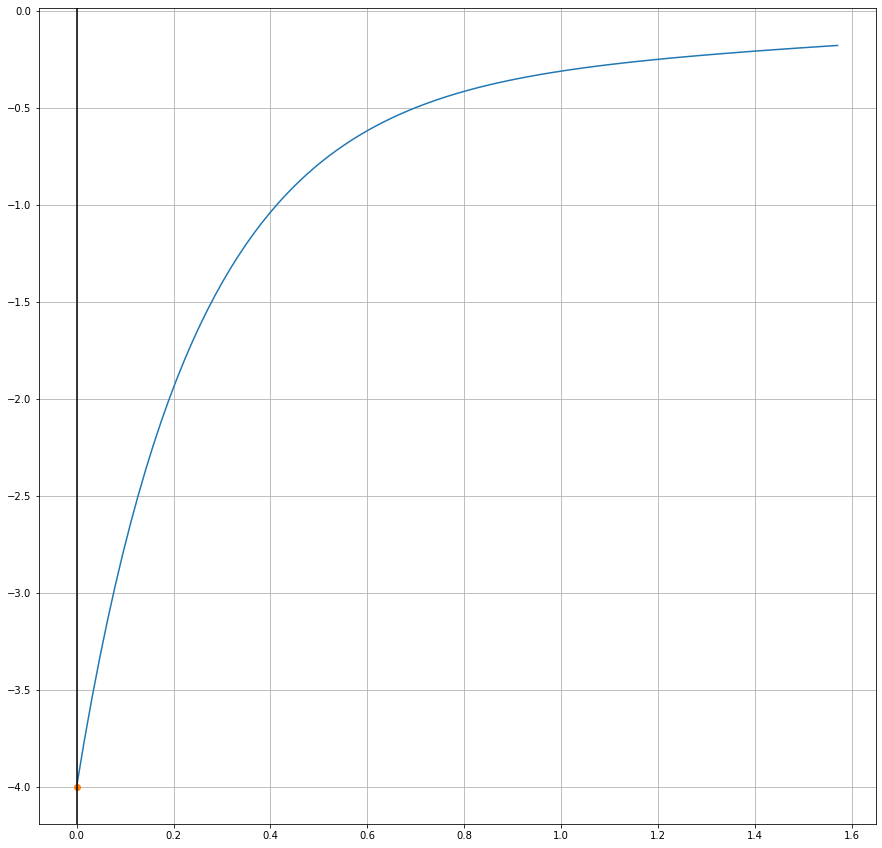

In [4]:
def show_4_derivative():
    import matplotlib.pyplot as plt

    xs = np.linspace(0,np.pi/2,100)

    ys = [yprime4.subs(x,i) for i in xs]

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(xs, ys, "-")
    ax.plot(0,yprime4.subs(x,0), "o")

    ax.grid(True, which='both')
    ax.axvline(x=0, color='k')
    fig.show()

show_4_derivative()
yprime4

In [5]:
def ET(a,b,N,M=1):
    h=(b-a)/N
    return (h**2/12)*(b-a)*M
    
def ES(a,b,N,M=4):
    h=(b-a)/N
    return (h**4/180)*(b-a)*M

In [6]:
def simps(f,a,b,N=50):
    ''' 
    f : função a integrar
    a : limite inferior do intervalo de integração
    b : limite inferior do intervalo de integração
    N : numero de subintervalos de [a,b]
    '''
    if N % 2 == 1:
        raise ValueError("N tem de ser par.")
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = (b-a)/N
#     print(y[1::2])
#     print(y[2:-1:2])
    S = h/3 * (y[0]+ y[-1]) + h/3 * np.sum(4*y[1::2]) + h/3 * np.sum(2*y[2:-1:2])
    return S

In [7]:
def trapz(f,a,b,N=50):
    ''' 
    f : função a integrar
    a : limite inferior do intervalo de integração
    b : limite inferior do intervalo de integração
    N : numero de subintervalos de [a,b]
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = (b - a)/N
    T = (h/2)*(y[0]+y[-1])+h*np.sum(y[1:-1])
    return T

In [8]:
def f(x):
    return np.log(1 + 2 * np.arctan(x/2))

a = 0
b = np.pi/2

In [9]:
def ES_findN_do_simps(f,eps,a,b,M=4):
    C = (b-a)*M
    h = ((eps*180)/C)**(1/4)
    n = (b-a)/h
    useN = np.int(np.ceil(n))
    if useN%2!=0:
        useN+=1
    answer = simps(f,a,b,useN)
    return (useN,answer)

In [10]:
for epss in [10**i for i in range(-1,-20,-1)]:
    print(f'{epss:e}',ES_findN_do_simps(f,epss,a,b,M=4))

print("--------------")
print(ES_findN_do_simps(f,5.188322e-05,a,b,M=4))
print(ES_findN_do_simps(f,3.242701e-06,a,b,M=4))
print(ES_findN_do_simps(f,2.026688e-07,a,b,M=4))
print("--------------")

N7,answer7 = ES_findN_do_simps(f,1e-08,a,b,M=4)
N12,answer12 = ES_findN_do_simps(f,1e-13,a,b,M=4)
print(f'N = {N7:4}', f'I = {answer7:.8f}')
print(f'N = {N12:4}', f'I = {answer12:.13f}')

1.000000e-01 (2, 0.8066880450301391)
1.000000e-02 (4, 0.8082484081506986)
1.000000e-03 (4, 0.8082484081506986)
1.000000e-04 (8, 0.8083842971239333)
1.000000e-05 (14, 0.8083935012986448)
1.000000e-06 (22, 0.8083944523712328)
1.000000e-07 (40, 0.8083946238300512)
1.000000e-08 (68, 0.8083946391109902)
1.000000e-09 (122, 0.8083946409917053)
1.000000e-10 (216, 0.8083946411722661)
1.000000e-11 (382, 0.8083946411906356)
1.000000e-12 (680, 0.8083946411925191)
1.000000e-13 (1208, 0.8083946411927065)
1.000000e-14 (2148, 0.8083946411927253)
1.000000e-15 (3820, 0.8083946411927272)
1.000000e-16 (6790, 0.8083946411927274)
1.000000e-17 (12074, 0.8083946411927274)
1.000000e-18 (21472, 0.8083946411927274)
1.000000e-19 (38182, 0.8083946411927274)
--------------
(10, 0.8083903303269021)
(18, 0.8083942212675739)
(34, 0.8083946079584095)
--------------
N =   68 I = 0.80839464
N = 1208 I = 0.8083946411927


In [11]:
for N in [2**i for i in range(1,21)]:
    print(f'{N:7}',f'{simps(f,a,b,N):20.15f}', f'{ES(a,b,N):e}')

      2    0.806688045030139 1.328210e-02
      4    0.808248408150699 8.301315e-04
      8    0.808384297123933 5.188322e-05
     16    0.808393970378431 3.242701e-06
     32    0.808394598853954 2.026688e-07
     64    0.808394638539953 1.266680e-08
    128    0.808394641026825 7.916751e-10
    256    0.808394641182357 4.947969e-11
    512    0.808394641192079 3.092481e-12
   1024    0.808394641192687 1.932801e-13
   2048    0.808394641192725 1.208000e-14
   4096    0.808394641192727 7.550002e-16
   8192    0.808394641192728 4.718751e-17
  16384    0.808394641192727 2.949220e-18
  32768    0.808394641192727 1.843262e-19
  65536    0.808394641192727 1.152039e-20
 131072    0.808394641192727 7.200243e-22
 262144    0.808394641192728 4.500152e-23
 524288    0.808394641192727 2.812595e-24
1048576    0.808394641192728 1.757872e-25


In [12]:
for N in [2**i for i in range(1,21)]:
    print(f'{N:7}',f'{trapz(f,a,b,N):20.15f}', f'{ET(a,b,N):e}')

      2    0.771232244566121 8.074551e-02
      4    0.798994367254554 2.018638e-02
      8    0.806036814656589 5.046595e-03
     16    0.807804681447971 1.261649e-03
     32    0.808247119502459 3.154122e-04
     64    0.808357758780579 7.885304e-05
    128    0.808385420465264 1.971326e-05
    256    0.808392336003084 4.928315e-06
    512    0.808394064894830 1.232079e-06
   1024    0.808394497118223 3.080197e-07
   2048    0.808394605174099 7.700492e-08
   4096    0.808394632188071 1.925123e-08
   8192    0.808394638941563 4.812808e-09
  16384    0.808394640629936 1.203202e-09
  32768    0.808394641052030 3.008005e-10
  65536    0.808394641157553 7.520012e-11
 131072    0.808394641183934 1.880003e-11
 262144    0.808394641190529 4.700007e-12
 524288    0.808394641192178 1.175002e-12
1048576    0.808394641192590 2.937505e-13


In [13]:
def f(x):
    return np.log(1 + 2 * np.arctan(x/2))

xs = np.linspace(a,b,8192+1)
ys = f(xs)

ref_simps = spi.simps(ys,xs)
ref_trapz = spi.trapz(ys,xs)

print("ref_simps =", ref_simps)
print("ref_trapz =", ref_trapz)

ref_simps = 0.8083946411927274
ref_trapz = 0.808394638941563
